In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from clort import ArgoverseDataset
from clort.clearn.data.cltracking import ContrastiveLearningTracking
from argoverse.utils.camera_stats import CAMERA_LIST, RING_CAMERA_LIST
from clort import ArgoverseObjectDataFrame
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
root = '../../../datasets/argoverse-tracking/train1/'

In [4]:
dataset = ContrastiveLearningTracking(root, occlusion_thresh = 30., central_crop=True, img_tr_ww = (0.9, 0.9), image_size_threshold=100, ids_repeat=200)

INFO - 2022-05-02 14:50:32,214 - synchronization_database - Building SynchronizationDB
INFO - 2022-05-02 14:50:32,772 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
WARNING - 2022-05-02 14:50:33,021 - synchronization_database - No corresponding stereo image at 315967661819717000: 176.11195999999998 > 100.0 ms
WARNING - 2022-05-02 14:50:33,026 - synchronization_database - No corresponding stereo image at 315967661819717000: 176.107928 > 100.0 ms
INFO - 2022-05-02 14:50:33,852 - vector_map_loader - Loaded root: ArgoverseVectorMap
INFO - 2022-05-02 14:50:35,377 - vector_map_loader - Loaded root: ArgoverseVectorMap


In [5]:
dataset.dataset_init(0, 5)

INFO - 2022-05-02 14:50:39,384 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,385 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,424 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,425 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,447 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,448 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,471 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,472 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,499 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:39,499 - argoverse_tracking_loader - syncronizing camera and lidar 

INFO - 2022-05-02 14:50:53,163 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,164 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,181 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,181 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,197 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,197 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,234 - argoverse_tracking_loader - syncronizing camera and lidar sensor...
INFO - 2022-05-02 14:50:53,235 - argoverse_tracking_loader - syncronizing camera and lidar sensor...


In [6]:
len(dataset)

5000

In [7]:
imgs, pcds, track_ids = dataset[11]
print(f'Image data shape: {imgs.shape}, Point Cloud data shape: {pcds.shape}, Track ids len: {len(track_ids)}')

Image data shape: torch.Size([5, 21, 200, 200]), Point Cloud data shape: torch.Size([5, 30, 3]), Track ids len: 5


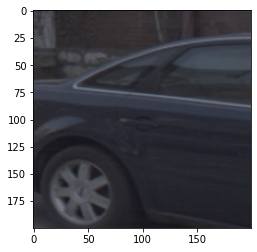

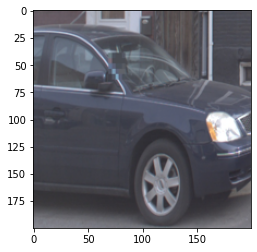

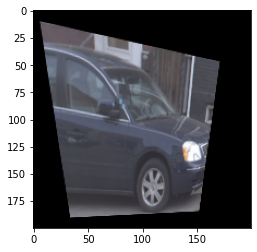

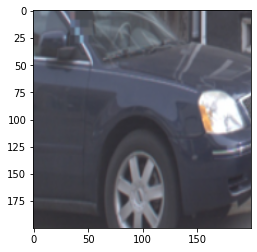

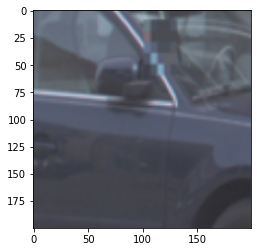

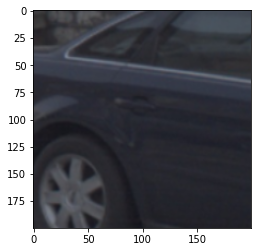

In [8]:
for i in range(0, 21-3, 3):
    plt.imshow(np.transpose(imgs[3, i:i+3, :, :], (1, 2, 0)))
    plt.show()

In [9]:
pcd1, pcd2 = o3d.geometry.PointCloud(), o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(pcds[2].numpy())
pcd2.points = o3d.utility.Vector3dVector(pcds[1].numpy())

In [10]:
o3d.visualization.draw_geometries([pcd1, pcd2])

In [11]:
track_ids

tensor([11, 11, 11, 11, 11], dtype=torch.int32)

In [12]:
import torch
from torch.utils.data import DataLoader

In [13]:
dl = DataLoader(dataset, batch_size=64, shuffle=True)

In [14]:
for imgs, pcds, track_ids in dl:
    b, n_view, C, H, W = imgs.size()
    _, _, n, d = pcds.size()
    
    imgs, pcds, track_ids = imgs.view(b*n_view, C, H, W), pcds.view(b*n_view, n, d), track_ids.flatten()
    
    print(f'Image data shape: {imgs.shape}, Point Cloud data shape: {pcds.shape}, Track ids len: {track_ids.shape}')
    break

Image data shape: torch.Size([320, 21, 200, 200]), Point Cloud data shape: torch.Size([320, 30, 3]), Track ids len: torch.Size([320])


In [16]:
features = torch.rand(b*n_view, 50)

In [17]:
features.shape

torch.Size([320, 50])

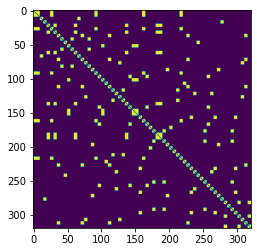

In [44]:
truth_map = (~torch.eye(b*n_view, dtype=torch.bool)) * (track_ids.unsqueeze(0) == track_ids.unsqueeze(1))
plt.imshow(truth_map.numpy().astype(np.uint8))
plt.show()